In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from matplotlib import pyplot as plt

%matplotlib inline

In [137]:
data = pd.read_excel('odidata02.xlsx')
data.tail()

,Home team,Away team_x,1,X,2,Time,Date,GG,NG,OV1.5,...,H W,H D,H L,A W,A D,A L,Scores,Away team_y,Week,Season
79325,London Reds,Leicester,2.41,3.20,2.97,1598,2022-03-29,1.69,2.12,1.29,...,1,1,3,1,2,2,13,Leicester,34.0,30103.0
79326,Sheffield U,West Ham,2.02,3.31,3.75,1598,2022-03-29,1.73,2.06,1.29,...,2,1,2,2,0,3,01,West Ham,34.0,30103.0
79327,Southampton,Manchester Blue,2.90,3.53,2.29,1598,2022-03-29,1.67,2.16,1.27,...,1,4,0,2,2,1,12,Manchester Blue,34.0,30103.0
79328,Tottenham,Palace,2.00,3.34,3.79,1598,2022-03-29,1.73,2.05,1.29,...,1,4,0,2,1,2,00,Palace,34.0,30103.0
79329,West Brom,Manchester Reds,2.97,3.61,2.22,1598,2022-03-29,1.68,2.14,1.27,...,3,2,0,3,1,1,00,Manchester Reds,34.0,30103.0


In [138]:
# data = data1[0:30000]
# data

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Home team      79330 non-null  object 
 1   Away team_x    79330 non-null  object 
 2   1              79330 non-null  float64
 3   X              79330 non-null  float64
 4   2              79330 non-null  float64
 5   Time           79330 non-null  int64  
 6   Date           79330 non-null  object 
 7   GG             79330 non-null  object 
 8   NG             79330 non-null  float64
 9   OV1.5          79330 non-null  float64
 10  UN1.5          79330 non-null  object 
 11  H standing     79330 non-null  int64  
 12  A standing     79330 non-null  int64  
 13  H points       79330 non-null  int64  
 14  A points       79330 non-null  int64  
 15  H Form points  79330 non-null  int64  
 16  A Form points  79330 non-null  int64  
 17  H W            79330 non-null  int64  
 18  H D   

In [140]:
data.columns

Index(['Home team', 'Away team_x', '1', 'X', '2', 'Time', 'Date', 'GG', 'NG',
       'OV1.5', 'UN1.5', 'H standing', 'A standing', 'H points', 'A points',
       'H Form points', 'A Form points', 'H W', 'H D', 'H L', 'A W', 'A D',
       'A L', 'Scores', 'Away team_y', 'Week', 'Season'],
      dtype='object')

In [142]:
data[['1', 'X', '2','GG', 'NG','OV1.5', 'UN1.5']].astype(str)

data = data[((data["Scores"].str.contains("__|n|A|NaN")) | data["GG"].str.contains(" ") | data["UN1.5"].str.contains(" ")) == False]
data[['1', 'X', '2','GG', 'NG','OV1.5', 'UN1.5']].astype(float)
data[['H W', 'H D', 'H L', 'A W', 'A D','A L', 'Scores', 'Week', 'Season',
     'H standing', 'A standing', 'H points', 'A points', 'H Form points', 'A Form points']].astype(int)
data[['Home team', 'Away team_x', 'Away team_y']].astype(str)
data.reset_index(drop=True, inplace=True)
data

,Home team,Away team_x,1,X,2,Time,Date,GG,NG,OV1.5,...,H W,H D,H L,A W,A D,A L,Scores,Away team_y,Week,Season
0,Burnley,Aston V,1.95,3.37,3.92,1730,2022-02-26,1.73,2.05,1.29,...,1,0,1,1,0,2,20,Aston V,4.0,29547.0
1,Palace,Aston V,2.15,3.22,3.48,1808,2022-02-26,1.72,2.08,1.29,...,1,1,3,2,1,2,00,Aston V,23.0,29547.0
2,Everton,Aston V,2.03,3.31,3.70,1812,2022-02-26,1.73,2.06,1.29,...,1,2,2,2,1,2,21,Aston V,25.0,29547.0
3,Manchester Blue,Aston V,1.60,3.87,5.53,1816,2022-02-26,1.81,1.96,1.26,...,2,2,1,0,1,4,00,Aston V,27.0,29547.0
4,Fulham,Aston V,2.55,3.32,2.70,2100,2022-02-26,1.68,2.13,1.28,...,1,0,4,1,2,2,00,Aston V,33.0,29549.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79199,London Reds,Leicester,2.41,3.20,2.97,1598,2022-03-29,1.69,2.12,1.29,...,1,1,3,1,2,2,13,Leicester,34.0,30103.0
79200,Sheffield U,West Ham,2.02,3.31,3.75,1598,2022-03-29,1.73,2.06,1.29,...,2,1,2,2,0,3,01,West Ham,34.0,30103.0
79201,Southampton,Manchester Blue,2.90,3.53,2.29,1598,2022-03-29,1.67,2.16,1.27,...,1,4,0,2,2,1,12,Manchester Blue,34.0,30103.0
79202,Tottenham,Palace,2.00,3.34,3.79,1598,2022-03-29,1.73,2.05,1.29,...,1,4,0,2,1,2,00,Palace,34.0,30103.0


# Prepare data for Logistic Regression

# FIRST:
### Convert the teams to numeric data

In [143]:
dct = {}
for num, team in enumerate(sorted(data['Home team'].unique()), start=1):
    dct[team] = num
print(dct)

{'Aston V': 1, 'Brighton': 2, 'Burnley': 3, 'Everton': 4, 'Fulham': 5, 'Leeds': 6, 'Leicester': 7, 'Liverpool': 8, 'London Blues': 9, 'London Reds': 10, 'Manchester Blue': 11, 'Manchester Reds': 12, 'Newcastle': 13, 'Palace': 14, 'Sheffield U': 15, 'Southampton': 16, 'Tottenham': 17, 'West Brom': 18, 'West Ham': 19, 'Wolves': 20}


In [144]:
# replace the team with categorical numbers shown above
for num, team in enumerate(sorted(data['Home team'].unique()), start=1):
    data = data.replace(team, num)
data

,Home team,Away team_x,1,X,2,Time,Date,GG,NG,OV1.5,...,H W,H D,H L,A W,A D,A L,Scores,Away team_y,Week,Season
0,3,1,1.95,3.37,3.92,1730,2022-02-26,1.73,2.05,1.29,...,1,0,1,1,0,2,20,1,4.0,29547.0
1,14,1,2.15,3.22,3.48,1808,2022-02-26,1.72,2.08,1.29,...,1,1,3,2,1,2,00,1,23.0,29547.0
2,4,1,2.03,3.31,3.70,1812,2022-02-26,1.73,2.06,1.29,...,1,2,2,2,1,2,21,1,25.0,29547.0
3,11,1,1.60,3.87,5.53,1816,2022-02-26,1.81,1.96,1.26,...,2,2,1,0,1,4,00,1,27.0,29547.0
4,5,1,2.55,3.32,2.70,2100,2022-02-26,1.68,2.13,1.28,...,1,0,4,1,2,2,00,1,33.0,29549.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79199,10,7,2.41,3.20,2.97,1598,2022-03-29,1.69,2.12,1.29,...,1,1,3,1,2,2,13,7,34.0,30103.0
79200,15,19,2.02,3.31,3.75,1598,2022-03-29,1.73,2.06,1.29,...,2,1,2,2,0,3,01,19,34.0,30103.0
79201,16,11,2.90,3.53,2.29,1598,2022-03-29,1.67,2.16,1.27,...,1,4,0,2,2,1,12,11,34.0,30103.0
79202,17,14,2.00,3.34,3.79,1598,2022-03-29,1.73,2.05,1.29,...,1,4,0,2,1,2,00,14,34.0,30103.0


# Scores:
convert the scores into categorical data


In [145]:
# Checking who won and who lost or was it a draw?
# Win = 1
# Loss = -1
# Draw = 0
# To create a multiclass logistic regression

for number, game in enumerate(data.loc[:,('Scores')]):
    
    
    s_h = int(game[0]) # scores home
    s_a = int(game[1]) # scores away
    
    if s_h > s_a:
        data.loc[number,('Outcome')] = 1 #/(1 + np.exp(-(s_h - s_a)))

        
    elif s_a > s_h:
        data.loc[number, ('Outcome')] = -1 #/(1 + np.exp(-(s_a - s_h)))


    else:
        data.loc[number, ('Outcome')] = 0

data

,Home team,Away team_x,1,X,2,Time,Date,GG,NG,OV1.5,...,H D,H L,A W,A D,A L,Scores,Away team_y,Week,Season,Outcome
0,3,1,1.95,3.37,3.92,1730,2022-02-26,1.73,2.05,1.29,...,0,1,1,0,2,20,1,4.0,29547.0,1.0
1,14,1,2.15,3.22,3.48,1808,2022-02-26,1.72,2.08,1.29,...,1,3,2,1,2,00,1,23.0,29547.0,0.0
2,4,1,2.03,3.31,3.70,1812,2022-02-26,1.73,2.06,1.29,...,2,2,2,1,2,21,1,25.0,29547.0,1.0
3,11,1,1.60,3.87,5.53,1816,2022-02-26,1.81,1.96,1.26,...,2,1,0,1,4,00,1,27.0,29547.0,0.0
4,5,1,2.55,3.32,2.70,2100,2022-02-26,1.68,2.13,1.28,...,0,4,1,2,2,00,1,33.0,29549.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79199,10,7,2.41,3.20,2.97,1598,2022-03-29,1.69,2.12,1.29,...,1,3,1,2,2,13,7,34.0,30103.0,-1.0
79200,15,19,2.02,3.31,3.75,1598,2022-03-29,1.73,2.06,1.29,...,1,2,2,0,3,01,19,34.0,30103.0,-1.0
79201,16,11,2.90,3.53,2.29,1598,2022-03-29,1.67,2.16,1.27,...,4,0,2,2,1,12,11,34.0,30103.0,-1.0
79202,17,14,2.00,3.34,3.79,1598,2022-03-29,1.73,2.05,1.29,...,4,0,2,1,2,00,14,34.0,30103.0,0.0


In [146]:
# Categorize the scores based on if both team scored. 
# GG = 1
# NG = 0
for number, game in enumerate(data.loc[:,('Scores')]):
    
    s_h = int(game[0]) # scores home
    s_a = int(game[1]) # scores away
    
    if s_h >= 1 and s_a >= 1:
        data.loc[number,('GG_Outcome')] = 1
    else: 
        data.loc[number,('GG_Outcome')] = 0
data

,Home team,Away team_x,1,X,2,Time,Date,GG,NG,OV1.5,...,H L,A W,A D,A L,Scores,Away team_y,Week,Season,Outcome,GG_Outcome
0,3,1,1.95,3.37,3.92,1730,2022-02-26,1.73,2.05,1.29,...,1,1,0,2,20,1,4.0,29547.0,1.0,0.0
1,14,1,2.15,3.22,3.48,1808,2022-02-26,1.72,2.08,1.29,...,3,2,1,2,00,1,23.0,29547.0,0.0,0.0
2,4,1,2.03,3.31,3.70,1812,2022-02-26,1.73,2.06,1.29,...,2,2,1,2,21,1,25.0,29547.0,1.0,1.0
3,11,1,1.60,3.87,5.53,1816,2022-02-26,1.81,1.96,1.26,...,1,0,1,4,00,1,27.0,29547.0,0.0,0.0
4,5,1,2.55,3.32,2.70,2100,2022-02-26,1.68,2.13,1.28,...,4,1,2,2,00,1,33.0,29549.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79199,10,7,2.41,3.20,2.97,1598,2022-03-29,1.69,2.12,1.29,...,3,1,2,2,13,7,34.0,30103.0,-1.0,1.0
79200,15,19,2.02,3.31,3.75,1598,2022-03-29,1.73,2.06,1.29,...,2,2,0,3,01,19,34.0,30103.0,-1.0,0.0
79201,16,11,2.90,3.53,2.29,1598,2022-03-29,1.67,2.16,1.27,...,0,2,2,1,12,11,34.0,30103.0,-1.0,1.0
79202,17,14,2.00,3.34,3.79,1598,2022-03-29,1.73,2.05,1.29,...,0,2,1,2,00,14,34.0,30103.0,0.0,0.0


In [147]:
# Categorize the scores based on if both team scored more than 2 goals. 
# OV = 1
# UN = 0

for number, game in enumerate(data.loc[:,('Scores')]):
    
    s_h = int(game[0]) # scores home
    s_a = int(game[1]) # scores away
    
    if s_h + s_a >= 2:
        data.loc[number,('Ov_Outcome')] = 1
    else: 
        data.loc[number,('Ov_Outcome')] = 0
data

,Home team,Away team_x,1,X,2,Time,Date,GG,NG,OV1.5,...,A W,A D,A L,Scores,Away team_y,Week,Season,Outcome,GG_Outcome,Ov_Outcome
0,3,1,1.95,3.37,3.92,1730,2022-02-26,1.73,2.05,1.29,...,1,0,2,20,1,4.0,29547.0,1.0,0.0,1.0
1,14,1,2.15,3.22,3.48,1808,2022-02-26,1.72,2.08,1.29,...,2,1,2,00,1,23.0,29547.0,0.0,0.0,0.0
2,4,1,2.03,3.31,3.70,1812,2022-02-26,1.73,2.06,1.29,...,2,1,2,21,1,25.0,29547.0,1.0,1.0,1.0
3,11,1,1.60,3.87,5.53,1816,2022-02-26,1.81,1.96,1.26,...,0,1,4,00,1,27.0,29547.0,0.0,0.0,0.0
4,5,1,2.55,3.32,2.70,2100,2022-02-26,1.68,2.13,1.28,...,1,2,2,00,1,33.0,29549.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79199,10,7,2.41,3.20,2.97,1598,2022-03-29,1.69,2.12,1.29,...,1,2,2,13,7,34.0,30103.0,-1.0,1.0,1.0
79200,15,19,2.02,3.31,3.75,1598,2022-03-29,1.73,2.06,1.29,...,2,0,3,01,19,34.0,30103.0,-1.0,0.0,0.0
79201,16,11,2.90,3.53,2.29,1598,2022-03-29,1.67,2.16,1.27,...,2,2,1,12,11,34.0,30103.0,-1.0,1.0,1.0
79202,17,14,2.00,3.34,3.79,1598,2022-03-29,1.73,2.05,1.29,...,2,1,2,00,14,34.0,30103.0,0.0,0.0,0.0


# Drop bad rows
Whose away_team x does not match away_team_y

In [150]:
# Drop rows that are not same for away team columns
data.drop(data[data['Away team_x'] != data['Away team_y']].index, inplace=True)
data.reset_index(drop=True, inplace=True)
data

,Home team,Away team_x,1,X,2,Time,Date,GG,NG,OV1.5,...,A W,A D,A L,Scores,Away team_y,Week,Season,Outcome,GG_Outcome,Ov_Outcome
0,3,1,1.95,3.37,3.92,1730,2022-02-26,1.73,2.05,1.29,...,1,0,2,20,1,4.0,29547.0,1.0,0.0,1.0
1,14,1,2.15,3.22,3.48,1808,2022-02-26,1.72,2.08,1.29,...,2,1,2,00,1,23.0,29547.0,0.0,0.0,0.0
2,4,1,2.03,3.31,3.70,1812,2022-02-26,1.73,2.06,1.29,...,2,1,2,21,1,25.0,29547.0,1.0,1.0,1.0
3,11,1,1.60,3.87,5.53,1816,2022-02-26,1.81,1.96,1.26,...,0,1,4,00,1,27.0,29547.0,0.0,0.0,0.0
4,5,1,2.55,3.32,2.70,2100,2022-02-26,1.68,2.13,1.28,...,1,2,2,00,1,33.0,29549.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78477,10,7,2.41,3.20,2.97,1598,2022-03-29,1.69,2.12,1.29,...,1,2,2,13,7,34.0,30103.0,-1.0,1.0,1.0
78478,15,19,2.02,3.31,3.75,1598,2022-03-29,1.73,2.06,1.29,...,2,0,3,01,19,34.0,30103.0,-1.0,0.0,0.0
78479,16,11,2.90,3.53,2.29,1598,2022-03-29,1.67,2.16,1.27,...,2,2,1,12,11,34.0,30103.0,-1.0,1.0,1.0
78480,17,14,2.00,3.34,3.79,1598,2022-03-29,1.73,2.05,1.29,...,2,1,2,00,14,34.0,30103.0,0.0,0.0,0.0


In [151]:
data.isnull().sum()

Home team        0
Away team_x      0
1                0
X                0
2                0
Time             0
Date             0
GG               0
NG               0
OV1.5            0
UN1.5            0
H standing       0
A standing       0
H points         0
A points         0
H Form points    0
A Form points    0
H W              0
H D              0
H L              0
A W              0
A D              0
A L              0
Scores           0
Away team_y      0
Week             0
Season           0
Outcome          0
GG_Outcome       0
Ov_Outcome       0
dtype: int64

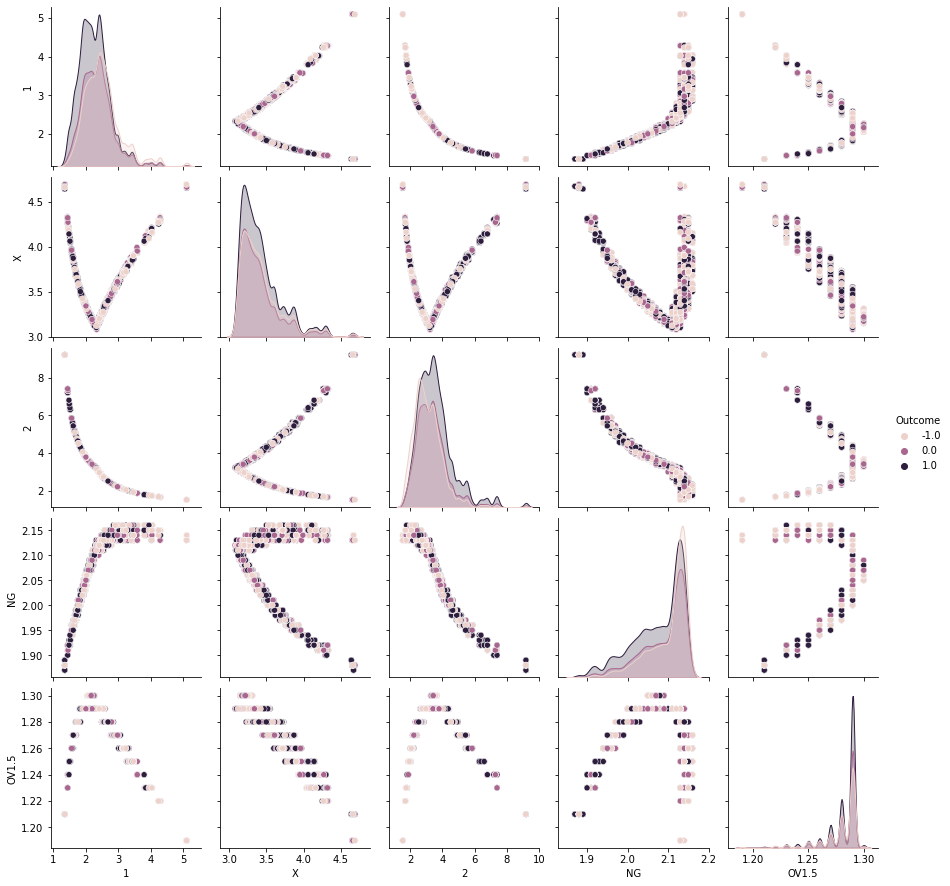

In [153]:
filtered_data = data[['1','X', '2','GG', 'NG','OV1.5', 'UN1.5','Outcome']]
g = sns.pairplot(filtered_data, hue='Outcome')

# FEATURE SELECTION

<AxesSubplot:xlabel='Outcome', ylabel='count'>

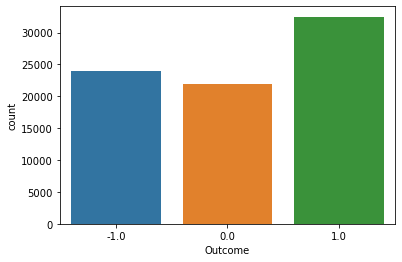

In [154]:
outcomes = data[['Outcome','GG_Outcome', 'Ov_Outcome']]

sns.countplot(x= 'Outcome',data=outcomes)


<AxesSubplot:xlabel='GG_Outcome', ylabel='count'>

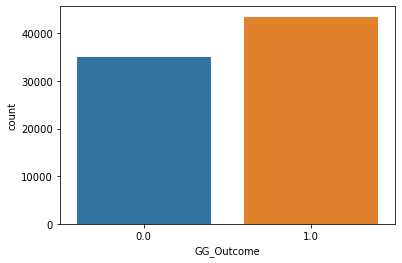

In [155]:
outcomes = data[['Outcome','GG_Outcome', 'Ov_Outcome']]

sns.countplot(x= 'GG_Outcome',data=outcomes)

<AxesSubplot:xlabel='Ov_Outcome', ylabel='count'>

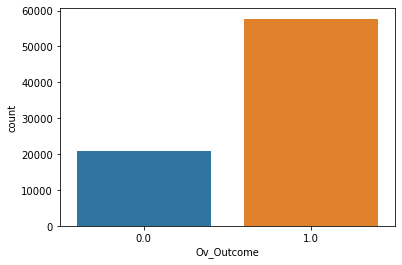

In [157]:
outcomes = data[['Outcome','GG_Outcome', 'Ov_Outcome']]

sns.countplot(x= 'Ov_Outcome',data=outcomes)

# THis will need a feature balancing when fiting to a model

# Checking feature importance to the match outcome

In [158]:
dd = data.drop(['Outcome','GG_Outcome','Date',  'Scores', 'Away team_y','Ov_Outcome'], axis=1)
X = dd.values
y = data['Ov_Outcome']

y = y.astype(int)

print(X.shape)
print(y.shape)

(78482, 24)
(78482,)


In [159]:
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

fi_col = []
fi = []

for i, column in enumerate(dd):
    print(column, "-->", dt.feature_importances_[i])
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

Home team --> 0.07131743259843953
Away team_x --> 0.04142095092754136
1 --> 0.03580991134208599
X --> 0.03878330218453954
2 --> 0.03411162356037799
Time --> 0.13651006671453156
GG --> 0.008558128144073508
NG --> 0.014396831823431756
OV1.5 --> 0.007389271762343296
UN1.5 --> 0.031351754230514374
H standing --> 0.05537571281837166
A standing --> 0.05361779169172186
H points --> 0.05504394510262136
A points --> 0.08959707083301509
H Form points --> 0.031345153037653284
A Form points --> 0.03351929792424929
H W --> 0.017376971556661847
H D --> 0.01595206594241246
H L --> 0.024578219228541292
A W --> 0.01603838606416547
A D --> 0.014113696932248732
A L --> 0.012689761196912222
Week --> 0.054366378997289806
Season --> 0.10673627538625674


In [160]:
fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature', 'Importance'])
fi_df.sort_values('Importance', ascending=False).reset_index()


,index,Feature,Importance
0,5,Time,0.136510
1,23,Season,0.106736
2,13,A points,0.089597
3,0,Home team,0.071317
4,10,H standing,0.055376
5,12,H points,0.055044
6,22,Week,0.054366
7,11,A standing,0.053618
8,1,Away team_x,0.041421
9,3,X,0.038783


# Data spliting

In [161]:

# Hold-out validation

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

(56506, 24)
(15697, 24)
(6279, 24)
(56506,)
(15697,)
(6279,)


# Logistic Regression

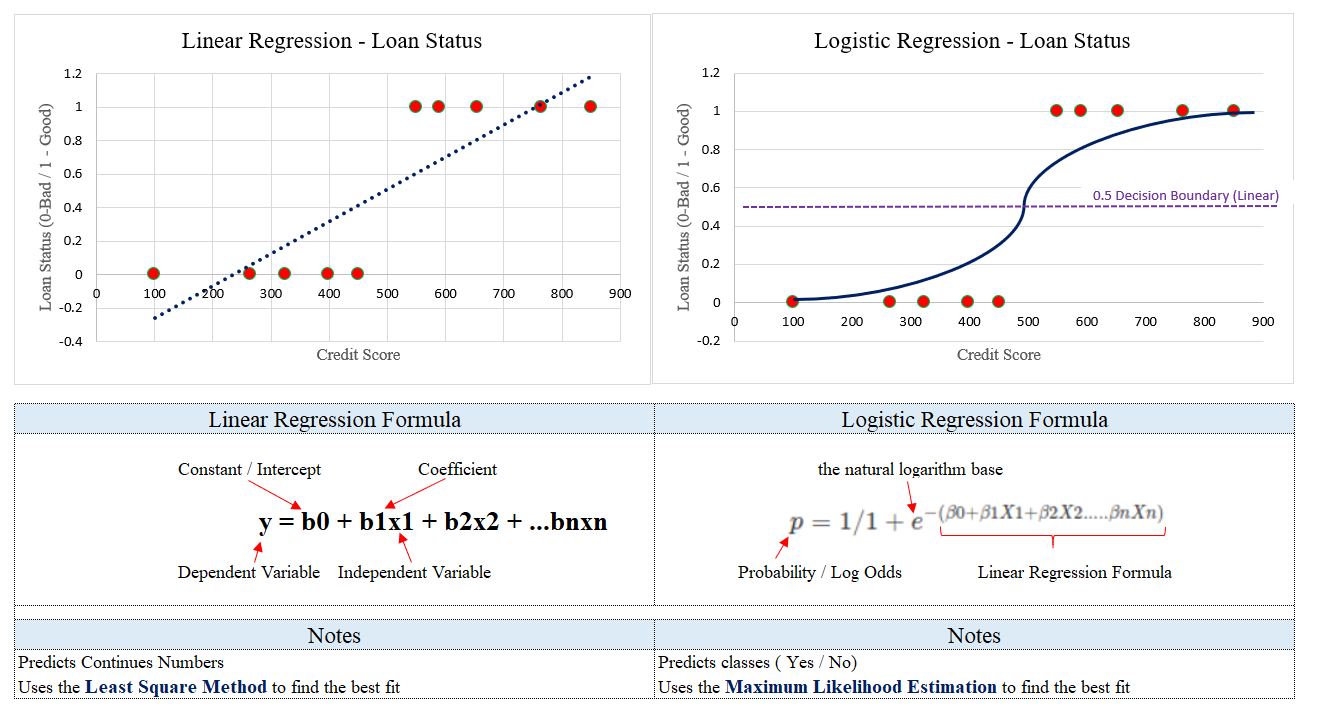

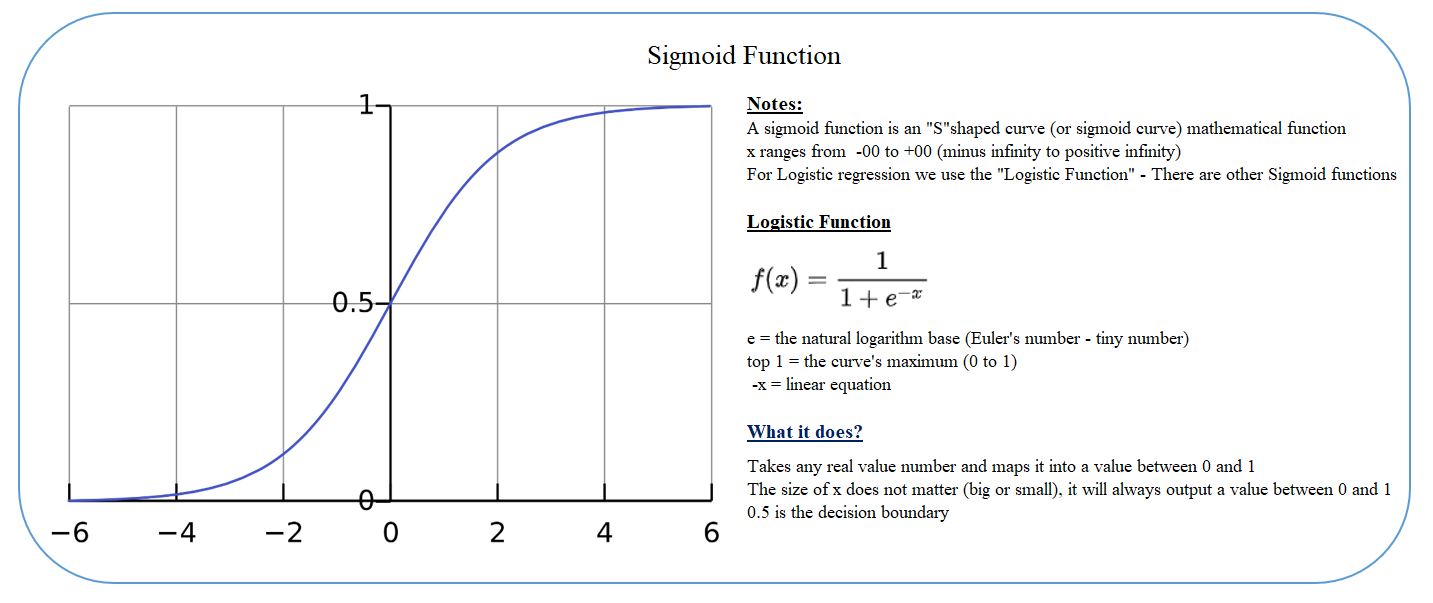

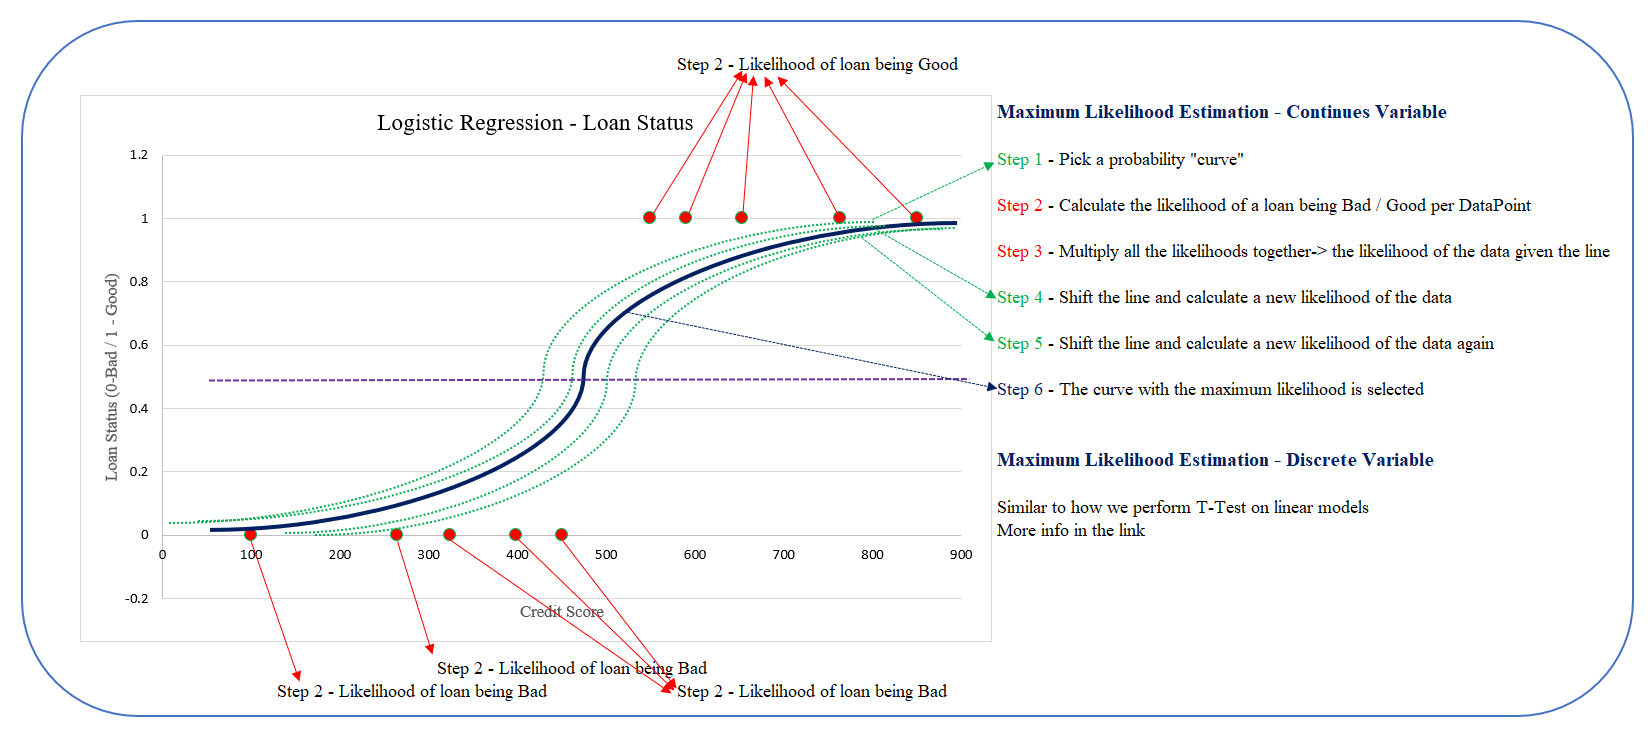

In [167]:
# Training my model

# log_reg = LogisticRegression(random_state=115, solver = 'lbfgs', penalty='l2', class_weight='balanced', C=2.1)
log_reg = LogisticRegression(random_state=15, solver = 'lbfgs')

log_reg.fit(X_train, y_train)

# SKLearn doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

LogisticRegression(random_state=15)

In [168]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

# score- Returns the mean accuracy on the given test data and labels - below

array([[ 1.47369392e-07, -2.73636421e-07,  5.45199225e-08,
         4.22525591e-08, -2.57982892e-08,  1.54144886e-05,
         1.80469724e-09,  3.60158842e-09, -6.93159240e-10,
         2.50503025e-08, -4.33322784e-08, -2.65206102e-07,
        -1.45303238e-08,  2.46353298e-07,  2.70952334e-07,
         1.71833128e-07,  4.83329756e-08,  1.38055973e-08,
        -3.73826032e-08,  7.60012878e-08, -5.60472351e-08,
         4.11668291e-11,  1.34006389e-07,  3.34930089e-05]])

In [169]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))


# Classification Report
print(classification_report(y_train, y_pred))

The Training Accuracy is:  0.7347715286872191
The Testing Accuracy is:  0.7398866025355163
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14987
           1       0.73      1.00      0.85     41519

    accuracy                           0.73     56506
   macro avg       0.37      0.50      0.42     56506
weighted avg       0.54      0.73      0.62     56506



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [170]:
log_reg.classes_

array([0, 1])

In [171]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

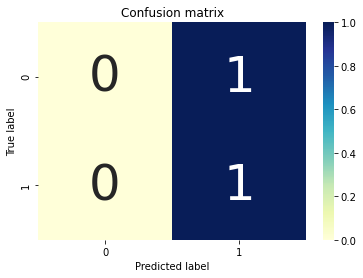

In [172]:
# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [ ]:
# reg.predict([[2.54, 3.30, 2.73]])

# Hyper Parameter Tuning
- We will loop over parameter C (Inverse of regularization strength).
- Inverse of regularization strength helps to avoid overfitting - it penalizes large values of your parameters
- It also helps to find Global Minimum by moving to better "solutions" from local minimum to global minimum
- The values of C to search should be n-equally-spaced values in log space ranging from 1e-5 to 1e5

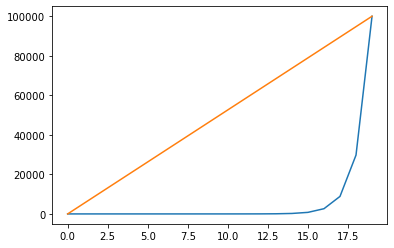

In [173]:
# Creating a range for C values
np.geomspace(1e-5, 1e5, num=20)

# ploting it
plt.plot(np.geomspace(1e-5, 1e5, num=20)) #  uniformly distributed in log space
plt.plot(np.linspace(1e-5, 1e5, num=20)) # uniformly distributed in linear space, instead of log space
# plt.plot(np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)) # same as geomspace

In [174]:
# Looping over the parameters

C_List = np.geomspace(1e-1, 1e15, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    # log_reg2 = LogisticRegression(random_state=15, solver = 'lbfgs',  class_weight='balanced', C=c)
    log_reg2 = LogisticRegression(random_state=15, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is :{}\n".format(c, log_loss2))


The CA of C parameter 0.1 is 0.7398866025355163:
The Logg Loss of C parameter 0.1 is :0.5733071104391949

The CA of C parameter 0.6951927961775606 is 0.7398866025355163:
The Logg Loss of C parameter 0.6951927961775606 is :0.5733071104392907

The CA of C parameter 4.832930238571752 is 0.7398866025355163:
The Logg Loss of C parameter 4.832930238571752 is :0.5733071104393044

The CA of C parameter 33.59818286283781 is 0.7398866025355163:
The Logg Loss of C parameter 33.59818286283781 is :0.5733071104393063

The CA of C parameter 233.57214690901213 is 0.7398866025355163:
The Logg Loss of C parameter 233.57214690901213 is :0.5733071104393067

The CA of C parameter 1623.776739188721 is 0.7398866025355163:
The Logg Loss of C parameter 1623.776739188721 is :0.5733071104393068

The CA of C parameter 11288.378916846883 is 0.7398866025355163:
The Logg Loss of C parameter 11288.378916846883 is :0.5733071104393068

The CA of C parameter 78475.99703514607 is 0.7398866025355163:
The Logg Loss of C pa

In [175]:
# putting the outcomes in a Table

# reshaping
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)

# zip
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])

#print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

,index,C_List,CA2,Logarithmic_Loss2
0,0,1.000000e-01,0.739887,0.573307
1,1,6.951928e-01,0.739887,0.573307
2,2,4.832930e+00,0.739887,0.573307
3,3,3.359818e+01,0.739887,0.573307
4,4,2.335721e+02,0.739887,0.573307
5,17,2.069138e+13,0.739887,0.573307
6,16,2.976351e+12,0.739887,0.573307
7,15,4.281332e+11,0.739887,0.573307
8,14,6.158482e+10,0.739887,0.573307
9,13,8.858668e+09,0.739887,0.573307


In [176]:
# Another way of doing the above
# Scikit-learn offers a LogisticRegressionCV module which implements Logistic Regression 
# with builtin cross-validation to find out the optimal C parameter

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg CV
# Log_reg3 = LogisticRegressionCV(random_state=15, solver = 'lbfgs',  class_weight='balanced', Cs = C_List)
Log_reg3 = LogisticRegressionCV(random_state=15, solver = 'lbfgs', Cs = C_List)
Log_reg3.fit(X_train, y_train)
print("The CA is:", Log_reg3.score(X_test, y_test))
pred_proba_t = Log_reg3.predict_proba(X_test)
log_loss3 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)

print("The optimal C parameter is: ", Log_reg3.C_)



# Doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html

The CA is: 0.7398866025355163
The Logistic Loss is:  0.5733072041891129
The optimal C parameter is:  [0.1]


## K-fold cross validation:
Advantage: K-fold cross validation uses all the training data to train the model, by applying k different splits; repeated train-test splits converge to the true accuracy given that the training data is representable for the underlying distribution; however in practise this is often overoptimistic. Disadvantage: The disadvantage of this method is that the training algorithm has to be rerun from the beginning k times, which means it takes k times as much computation to get an evaluation. Additionally, if you want to test the performance on a completely new dataset that the algorithm has never seen, you cannot do this with k-fold cross validation.

### Hold-out:
Advantage: The advantage of Hold-out is that you can test how your model performs on completely unseen data that you haven't used when training the model. Additionally, Hold-out is usually much faster and less computationally expensive. Disadvantage: The evaluation may depend heavily on which data points end up in the training set and which end up in the test set, and thus the evaluation may be significantly different depending on how the division is made.

In [177]:
# Training a Dummy Classifier

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
score = dummy_clf.score(X_test, y_test)

pred_proba_t = dummy_clf.predict_proba(X_test)
log_loss2 = log_loss(y_test, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)


# Doc: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

Testing Acc: 0.7398866025355163
Log Loss: 8.983998472346329


In [178]:
# Final Model 
# Predicting on completely new data

log_reg3 = LogisticRegression(random_state=15, solver = 'lbfgs', C=0.1)
log_reg3.fit(X_train, y_train)
score = log_reg3.score(X_valid, y_valid)

pred_proba_t = log_reg3.predict_proba(X_valid)
log_loss2 = log_loss(y_valid, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)

Testing Acc: 0.7289377289377289
Log Loss: 0.5844012213318955


In [ ]:
"""
param_grid = [    
    {'penalty' : [ 'l2'],
    'C' : np.logspace(-4, 4),
    'solver' : ['sag','saga'],
    'max_iter' : [100, 1000]
    }
]


clf = GridSearchCV(logi, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

best_clf = clf.fit(X_train, y_train)

best_clf.score(X_test, y_test)
"""